<a href="https://colab.research.google.com/github/sakshi43/dumbo/blob/main/Tomato_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras import layers,models

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/TomatoDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE



)

Found 14355 files belonging to 9 classes.


In [6]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
dataset.class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
class_names=dataset.class_names

In [9]:
len(dataset)

449

In [10]:
len(class_names)

9

In [11]:
for images_batch,label_batch in dataset.take(1):
  print(images_batch,label_batch[0].numpy())

tf.Tensor(
[[[[108. 110. 133.]
   [109. 111. 134.]
   [146. 148. 171.]
   ...
   [ 40.  36.  59.]
   [102.  98. 121.]
   [ 87.  83. 106.]]

  [[133. 135. 158.]
   [147. 149. 172.]
   [126. 128. 151.]
   ...
   [ 71.  67.  90.]
   [150. 146. 169.]
   [ 82.  78. 101.]]

  [[118. 120. 143.]
   [164. 166. 189.]
   [113. 115. 138.]
   ...
   [ 85.  81. 104.]
   [106. 102. 125.]
   [100.  96. 119.]]

  ...

  [[142. 143. 163.]
   [115. 116. 136.]
   [130. 131. 151.]
   ...
   [ 91.  84. 100.]
   [106.  99. 115.]
   [ 90.  83.  99.]]

  [[102. 103. 123.]
   [116. 117. 137.]
   [129. 130. 150.]
   ...
   [119. 112. 128.]
   [127. 120. 136.]
   [ 91.  84. 100.]]

  [[104. 105. 125.]
   [121. 122. 142.]
   [107. 108. 128.]
   ...
   [ 93.  86. 102.]
   [ 93.  86. 102.]
   [ 98.  91. 107.]]]


 [[[138. 143. 147.]
   [136. 141. 145.]
   [131. 136. 140.]
   ...
   [121. 125. 128.]
   [121. 125. 128.]
   [121. 125. 128.]]

  [[138. 143. 147.]
   [137. 142. 146.]
   [132. 137. 141.]
   ...
   [122. 1

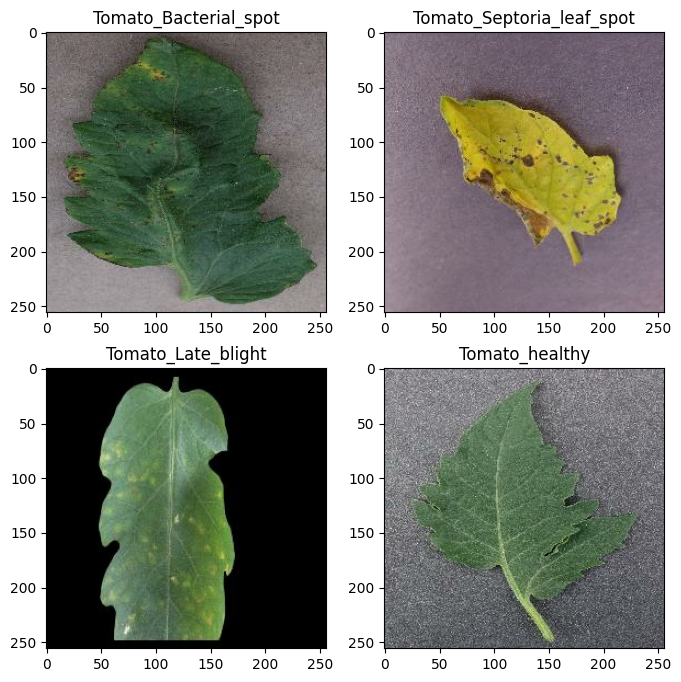

In [12]:
plt.figure(figsize=(8,8))

for  images_batch,label_batch in dataset.take(1):
  for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(class_names[label_batch[i]])
    plt.imshow(images_batch[i].numpy().astype('uint8'))
plt.show()

In [13]:
train_data=0.8
len(dataset)*train_data

359.20000000000005

In [14]:
test_data=dataset.skip(359)

In [15]:
len(test_data)

90

In [16]:
val_size=0.1
len(dataset)*val_size

44.900000000000006

In [17]:
val_size=test_data.take(1)

In [18]:
len(val_size)

1

In [19]:
test_ds=test_data.skip(1)
test_ds

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [22]:
train_ds, val_ds, test_ds

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [23]:
len(train_ds)

359

In [24]:
len(val_ds)

44

In [25]:
len(test_ds)

46

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
resize_rescaled=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1/255)

])

In [29]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [30]:
from tensorflow.keras import layers, models

CHANNELS=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=9
model=models.Sequential([
    resize_rescaled,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']


)

In [ ]:
history=model.fit(train_ds,epochs=5,batch_size=BATCH_SIZE,
                  verbose=1,validation_data=val_ds)

Epoch 1/5


In [ ]:
score=model.evaluate(test_ds)

In [ ]:
score

In [ ]:
history

In [ ]:
history.history

In [ ]:
history.param

In [ ]:
history.history.keys()

In [ ]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
loss=history.history['loss']

In [ ]:
EPOCHS=10
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label="training",color='purple')
plt.plot(range(EPOCHS),val_acc,label="validation",color='red')
plt.title("training and validation accuracy")
plt.legend(loc="lower right")

EPOCHS=10
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label="training",color='purple')
plt.plot(range(EPOCHS),val_loss,label="validation",color='red')
plt.legend(loc="upper right")
plt.title("training and validation loss")
plt.show()

In [ ]:
for image_batch,label_batch in test_ds.take(1):

  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()
  print("first predicted image: ")
  plt.imshow(first_image)
  print(" actual_label:-",class_name[first_label])

  batch_prediction=model.predict(image_batch)
  # print(batch_prediction[0])

  print("predicted_label: ",class_name[np.argmax(batch_prediction[0])])